In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
beta = math.radians(67.5)
#beta = math.radians(45)
#
#h = 0.498
#a = 0.552
#h = h/np.cos(math.pi/2 - beta)
h = 1
a = 1
#
phi_min = 0.0
phi_max = 180.0
nn = 400
#
n1_phi = 0.0
n1_theta = math.pi-beta
#n1_phi = 0.0
#n1_theta = math.radians(90)
n1_x = np.cos(n1_phi)*np.sin(n1_theta)
n1_y = np.sin(n1_phi)*np.sin(n1_theta)
n1_z = np.cos(n1_theta)
n1 = np.array([n1_x,n1_y,n1_z]).reshape((1,3))
print(np.linalg.norm(n1))
print('n1_x = ',n1_x)
print('n1_y = ',n1_y)
print('n1_z = ',n1_z)

1.0
n1_x =  0.9238795325112867
n1_y =  0.0
n1_z =  -0.3826834323650897


In [3]:
def get_n(phi,/):
    n_x = np.cos(phi)*np.sin(math.pi-beta)
    n_y = np.sin(phi)*np.sin(math.pi-beta)
    n_z = np.zeros(n_y.shape)+np.cos(math.pi-beta)
    n = np.array([n_x,n_y,n_z])
    #print(n_z)
    #print(np.linalg.norm(n,axis=0))
    #print(np.linalg.norm(n))
    return n

In [4]:
def get_the_projection_surface(phi,/):
    n = get_n(phi)
    s1 = a*h*np.abs(n1.dot(n)) 
    #s1 = a*h*n1.dot(n)
    print('s1 min = ',np.min(s1))
    print('s1 max = ',np.max(s1))
    return s1

In [5]:
#phi = math.radians(10)
phi = np.linspace(start=phi_min, stop=phi_max, num=nn)
#phi = np.linspace(start=phi_min, stop=phi_max, num=2)
s1 = get_the_projection_surface(phi/180.0*math.pi)

s1 min =  0.002642969067371981
s1 max =  0.9999999999999999


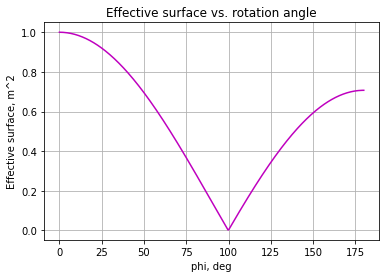

In [6]:
#phi=phi.reshape(s1.shape)
plt.plot(phi, np.squeeze(s1),'m-')
plt.xlabel('phi, deg')
plt.ylabel('Effective surface, m^2')
plt.title('Effective surface vs. rotation angle')
plt.grid(True)
#plt.legend(('bottom'))
#plt.savefig("EffectiveSurface.pdf")
plt.show()